In [3]:
%pylab inline
import random

Populating the interactive namespace from numpy and matplotlib


In [4]:
def distDataPoint(time,cores,executors,maxPartitions,samplingPartitions,splitMatrix):
    return {
        'time': time, 'cores': cores, 'executors': executors, 'maxPartitions': maxPartitions,
        'samplingPartitions': samplingPartitions, 'splitMatrix': splitMatrix
    }

In [5]:
cores = [1,4,9,16]
time_total = [100.5,40.2,27.3,19.0]
time_dissim = [96.4,35.8,21.9,13.8]

inde = range(1,20)
expo = [time_dissim[1]*4/i for i in inde]

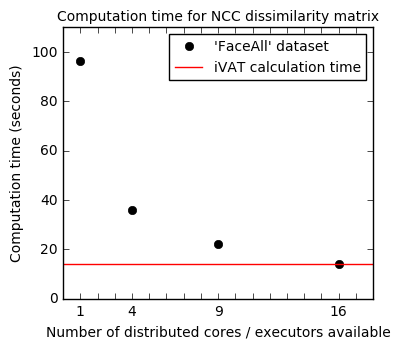

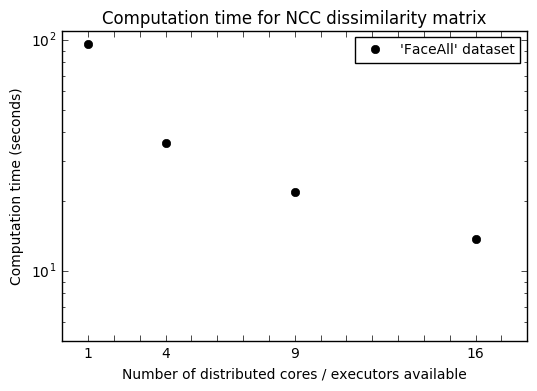

In [6]:
#plt.plot(cores,time_total,'go',label='')
sb1 = figure(figsize = (4,3.5));
plt.plot(cores,time_dissim,'ko',label='\'FaceAll\' dataset');
plt.plot([0,20],[14.114665031433105,14.114665031433105],'r',label='iVAT calculation time');
ax = sb1.get_axes()[0].get_xaxis()
ax.set_ticks(range(1,18))
tklbs = ['' for i in range(1,18)]
for i in range(1,5): tklbs[i*i-1] = i*i
ax.set_ticklabels(tklbs)
#plt.plot(inde,expo)
plt.axis([None,18,0,110],fontsize='medium')
plt.xlabel('Number of distributed cores / executors available',fontsize='medium')
plt.ylabel('Computation time (seconds)',fontsize='medium')
plt.title('Computation time for NCC dissimilarity matrix',fontsize='medium')
plt.legend(numpoints=1,fontsize='medium');

plt.savefig("./images/dist_time_w_cores.pdf",type="pdf",bbox_inches='tight')

sb2 = figure(figsize = (6,4));
plt.plot(cores,time_dissim,'ko',label='\'FaceAll\' dataset');
ax = sb2.get_axes()[0]
xax = ax.get_xaxis()
xax.set_ticks(range(1,18))
tklbs = ['' for i in range(1,18)]
for i in range(1,5): tklbs[i*i-1] = i*i
xax.set_ticklabels(tklbs)
ax.set_yscale('log')
#plt.plot(inde,expo)
plt.axis([None,18,5,110])
plt.xlabel('Number of distributed cores / executors available')
plt.ylabel('Computation time (seconds)')
plt.title('Computation time for NCC dissimilarity matrix')
plt.legend(numpoints=1,fontsize='medium');


In [33]:
results = np.array([[25, 5, 0.25, 20.245777130126953, 1.6418039798736572, 1.0827839374542236, 0.05900287628173828, 0.36163806915283203],
                    [25, 10, 0.25, 21.363548040390015, 3.9520750045776367, 0.9524469375610352, 0.03561806678771973, 0.3035109043121338],
                    [25, 20, 0.25, 20.868146181106567, 7.745929956436157, 0.7924458980560303, 0.03124713897705078, 0.3694298267364502],
                    [25, 5, 0.5, 21.033538818359375, 2.014000177383423, 1.0812468528747559, 0.06787395477294922, 1.8291912078857422],
                    [25, 5, 1.0, 21.775142002105713, 0.0, 0.0, 0.10024094581604004, 14.114665031433105]])

# Manually changed last row to assist with plotting - original data below:
#[25, 5, 1.0, 0.8444170951843262, 0.0, 21.975142002105713, 0.10024094581604004, 14.114665031433105]

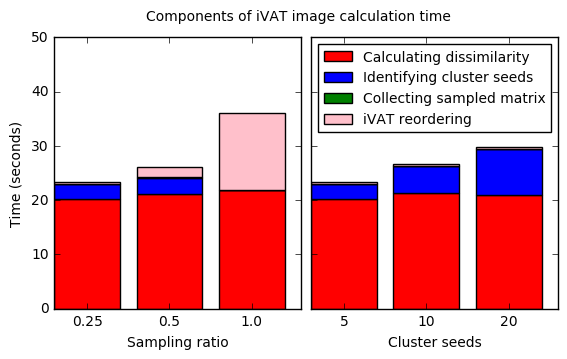

In [34]:
fig = figure(figsize=(6.5,3.5))

plt.suptitle('Components of iVAT image calculation time',fontsize='medium')

sub2 = subplot(1,2,1)
ind = range(3)
sampdisstime = results[[0,3,4],3]
sampdingtime = results[[0,3,4],4]
sampsamptime = results[[0,3,4],5]
sampcombtime = sampdingtime+sampsamptime
sampmattime = results[[0,3,4],6]
sampvattime = results[[0,3,4],7]
plt.bar(ind,sampdisstime,color='r',label='Calculating dissimilarity')
base1 = sampdisstime.copy()
plt.bar(ind,sampcombtime,bottom=base1,color='b',label='Identifying cluster seeds')
base1 += sampcombtime
plt.bar(ind,sampmattime,bottom=base1,color='g',label='Collecting matrix')
base1 += sampmattime
plt.bar(ind,sampvattime,bottom=base1,color='pink',label='iVAT reordering')
plt.axis([None,None,0,50],fontsize='medium')
plt.xticks([0.4,1.4,2.4], ('0.25', '0.5', '1.0'),fontsize='medium')
plt.ylabel('Time (seconds)',fontsize='medium')
plt.xlabel('Sampling ratio',fontsize='medium')

sub1 = subplot(1,2,2)
ind = range(3)
ratdisstime = results[0:3,3]
ratdingtime = results[0:3,4]
ratsamptime = results[0:3,5]
ratcombtime = ratdingtime+ratsamptime
ratmattime = results[0:3,6]
ratvattime = results[0:3,7]
plt.bar(ind,ratdisstime,color='r',label='Calculating dissimilarity')
base2 = ratdisstime.copy()
plt.bar(ind,ratcombtime,bottom=base2,color='b',label='Identifying cluster seeds')
base2 += ratcombtime
plt.bar(ind,ratmattime,bottom=base2,color='g',label='Collecting sampled matrix')
base2 += ratmattime
plt.bar(ind,ratvattime,bottom=base2,color='pink',label='iVAT reordering')
plt.xticks([0.4,1.4,2.4], ('5', '10', '20'),fontsize='medium')
xax = sub1.axes.yaxis.set_ticklabels([])
plt.xlabel('Cluster seeds',fontsize='medium')
plt.axis([None,None,0,50])
plt.legend(fontsize='medium')

fig.subplots_adjust(wspace = 0.04)

plt.savefig("./images/dist_time_w_ratio-pclust.pdf",type="pdf",bbox_inches='tight')

In [35]:
results = np.array([[25, 5, 0.25, 7.842128038406372, 0.016887187957763672, 3.6769678592681885, 0.34485602378845215],
                    [25, 10, 0.25, 10.562991857528687, 0.02172708511352539, 3.5780279636383057, 0.3326139450073242],
                    [25, 20, 0.25, 16.068857192993164, 0.016966819763183594, 3.2867791652679443, 0.3536238670349121],
                    [25, 5, 0.5, 7.89321494102478, 0.026523113250732422, 8.035875082015991, 1.8468689918518066],
                    [25, 5, 1.0, 0.0,              0.000000000000000,    21.975142002105713, 14.114665031433105]])

# Manually changed last row to assist with plotting - original data below:
#[25, 5, 1.0, 0.8444170951843262, 0.0, 21.975142002105713, 0.10024094581604004, 14.114665031433105]

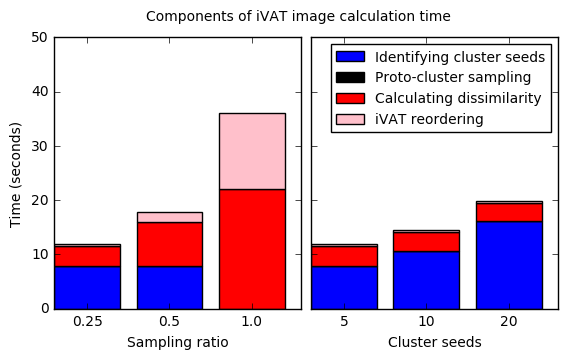

In [36]:
fig = figure(figsize=(6.5,3.5))

plt.suptitle('Components of iVAT image calculation time',fontsize='medium')

sub2 = subplot(1,2,1)
ind = range(3)

sampdingtime = results[[0,3,4],3]
sampsindtime = results[[0,3,4],4]
sampdisstime = results[[0,3,4],5]
sampvattime = results[[0,3,4],6]
plt.bar(ind,sampdingtime,color='b',label='Identifying cluster seeds')
base1 = sampdingtime.copy()
plt.bar(ind,sampsindtime,bottom=base1,color='k',label='Centralised sampling')
base1 += sampsindtime
plt.bar(ind,sampdisstime,bottom=base1,color='r',label='Calculate dissimilarity')
base1 += sampdisstime
plt.bar(ind,sampvattime,bottom=base1,color='pink',label='iVAT reordering')
plt.axis([None,None,0,50],fontsize='medium')
plt.xticks([0.4,1.4,2.4], ('0.25', '0.5', '1.0'),fontsize='medium')
plt.ylabel('Time (seconds)',fontsize='medium')
plt.xlabel('Sampling ratio',fontsize='medium')

sub1 = subplot(1,2,2)
ind = range(3)
ratdingtime = results[0:3,3]
ratsamptime = results[0:3,4]
ratdisstime = results[0:3,5]
ratvattime = results[0:3,6]
plt.bar(ind,ratdingtime,color='b',label='Identifying cluster seeds')
base2 = ratdingtime.copy()
plt.bar(ind,ratsamptime,bottom=base2,color='k',label='Proto-cluster sampling')
base2 += ratsamptime
plt.bar(ind,ratdisstime,bottom=base2,color='r',label='Calculating dissimilarity')
base2 += ratdisstime
plt.bar(ind,ratvattime,bottom=base2,color='pink',label='iVAT reordering')
plt.xticks([0.4,1.4,2.4], ('5', '10', '20'),fontsize='medium')
xax = sub1.axes.yaxis.set_ticklabels([])
plt.xlabel('Cluster seeds',fontsize='medium')
plt.axis([None,None,0,50])
plt.legend(fontsize='medium')

fig.subplots_adjust(wspace = 0.04)

plt.savefig("./images/dist_time_w_ratio-pclust_svat.pdf",type="pdf",bbox_inches='tight')